In [1]:
%matplotlib notebook
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
crime = pd.read_table('readonly/CommViolPredUnnormalizedData.txt', sep=',', na_values='?')
# remove features with poor coverage or lower relevance, and keep ViolentCrimesPerPop target column
columns_to_keep = [5, 6] + list(range(11,26)) + list(range(32, 103)) + [145]  
crime = crime.iloc[:,columns_to_keep].dropna()
crime.head()

,population,householdsize,agePct12t21,agePct12t29,agePct16t24,agePct65up,numbUrban,pctUrban,medIncome,pctWWage,...,MedOwnCostPctInc,MedOwnCostPctIncNoMtg,NumInShelters,NumStreet,PctForeignBorn,PctBornSameState,PctSameHouse85,PctSameCity85,PctSameState85,ViolentCrimesPerPop
0,11980,3.10,12.47,21.44,10.93,11.33,11980,100.0,75122,89.24,...,21.1,14.0,11,0,10.66,53.72,65.29,78.09,89.14,41.02
1,23123,2.82,11.01,21.30,10.48,17.18,23123,100.0,47917,78.99,...,20.7,12.5,0,0,8.30,77.17,71.27,90.22,96.12,127.56
2,29344,2.43,11.36,25.88,11.01,10.28,29344,100.0,35669,82.00,...,21.7,11.6,16,0,5.00,44.77,36.60,61.26,82.85,218.59
3,16656,2.40,12.55,25.20,12.19,17.57,0,0.0,20580,68.15,...,20.6,14.5,0,0,2.04,88.71,56.70,90.17,96.24,306.64
5,140494,2.45,18.09,32.89,20.04,13.26,140494,100.0,21577,75.78,...,17.3,11.7,327,4,1.49,64.35,42.29,70.61,85.66,442.95


In [3]:
from sklearn.datasets import make_classification, make_blobs
from matplotlib.colors import ListedColormap
from sklearn.datasets import load_breast_cancer

cmap_bold = ListedColormap(['#FFFF00', '#00AAFF', '#000000', '#FF00AA'])

<IPython.core.display.Javascript object>


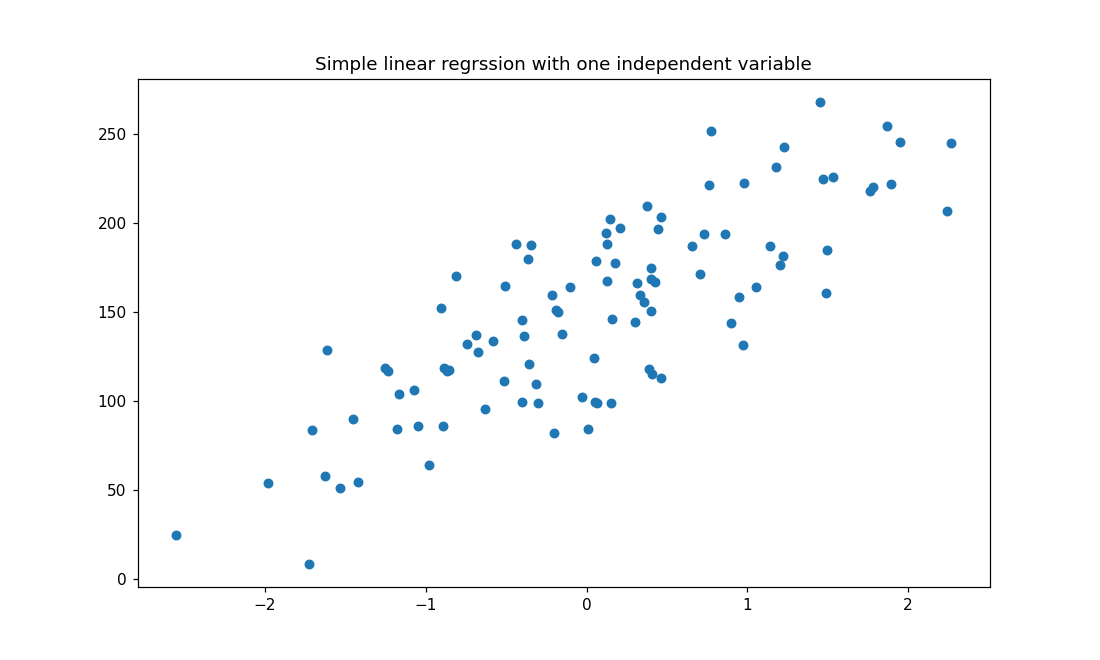

In [4]:
# Synthetic dataset for simple regrssion

from sklearn.datasets import make_regression
plt.figure(figsize=(10,6))
plt.title('Simple linear regrssion with one independent variable')
X_r1, y_r1 = make_regression(n_samples=100, n_features=1, n_informative=1, bias=150.0, noise=30, random_state=0)
plt.scatter(X_r1, y_r1, marker='o', s=30)
plt.show()

<IPython.core.display.Javascript object>


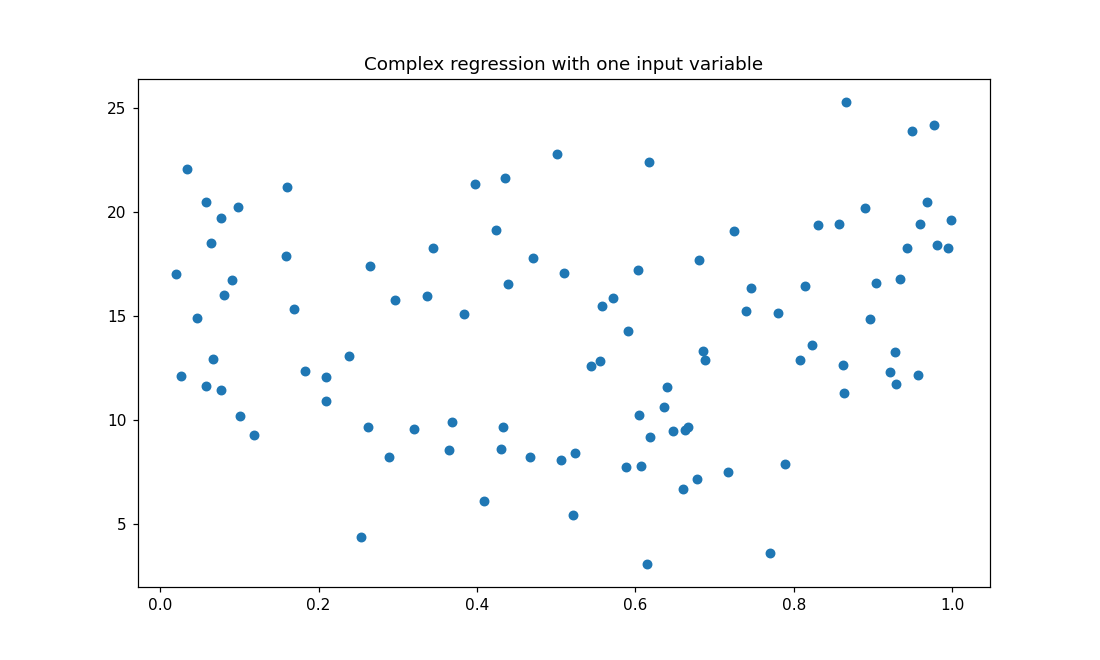

In [5]:
# Synthetic dataset for more complex regression

from sklearn.datasets import make_friedman1

plt.figure(figsize=(10,6))
plt.title('Complex regression with one input variable')
X_f1, y_f1 = make_friedman1(n_samples=100, n_features=7, random_state=0)
plt.scatter(X_f1[:,2], y_f1, marker='o', s=30)

<IPython.core.display.Javascript object>


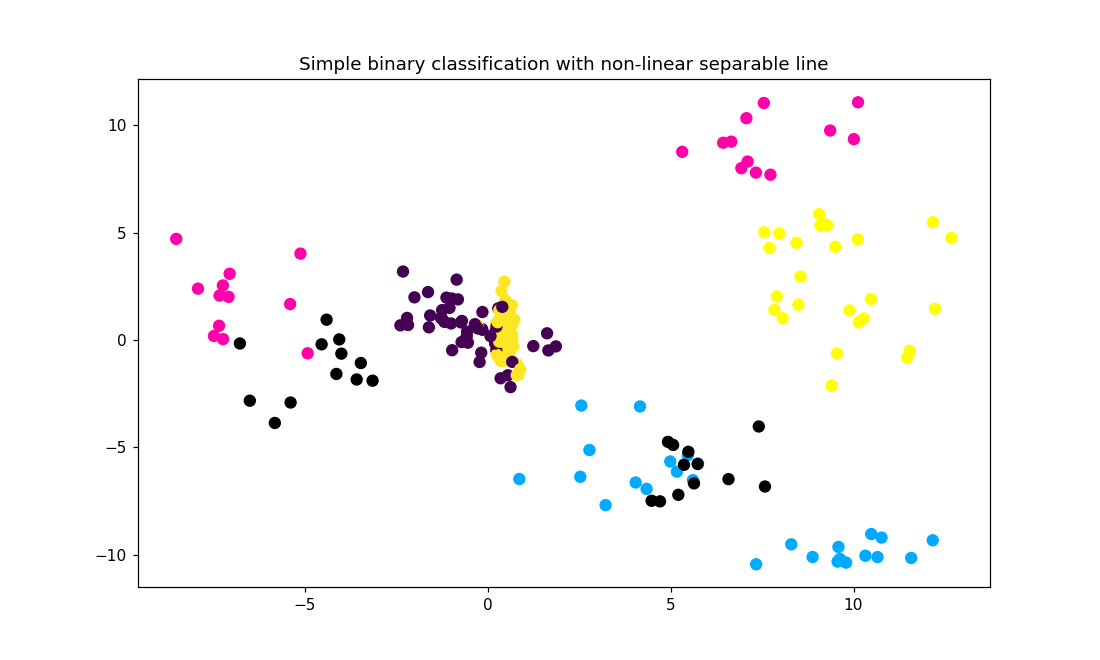

In [6]:
# Synthetic dataset for binary classification

plt.figure(figsize = (10,6))
plt.title("Simple binary classification with two informative features")
X_c1, y_c1 = make_classification(n_samples = 100, n_features=2,
                                n_redundant=0, n_informative=2,
                                n_clusters_per_class=1, flip_y = 0.1,
                                class_sep = 0.5, random_state=0)
plt.scatter(X_c1[:,0], X_c1[:,1], c=y_c1, marker='o', s=50)

In [7]:
# More difficult synhetic dataset for binary classification which are note linearly seperable

plt.plot(figsize = (10,6))
plt.title('Simple binary classification with non-linear separable line')
X_c2, y_c2 = make_blobs(n_samples = 100, n_features = 2, centers = 8,cluster_std = 1.3, random_state = 4)
plt.scatter(X_c2[:,0], X_c2[:,1], c=y_c2, s=50, cmap=cmap_bold)
plt.show()

In [8]:
# Function for plotting binary class in knn

def plot_binary_knn(X, y, n_neighbors, weights, X_test, y_test):
    import numpy
    from sklearn import neighbors
    import matplotlib.patches as mpatches
    X_mat = X
    y_mat = y
    # Create color maps
    cmap_light = ListedColormap(['#FFFFAA', '#AAFFAA', '#AAAAFF','#EFEFEF'])
    cmap_bold  = ListedColormap(['#FFFF00', '#00FF00', '#0000FF','#000000'])

    clf = neighbors.KNeighborsClassifier(n_neighbors, weights=weights)
    clf.fit(X_mat, y_mat)

    # Plot the decision boundary by assigning a color in the color map
    # to each mesh point.
    
    mesh_step_size = .01  # step size in the mesh
    plot_symbol_size = 50
    
    x_min, x_max = X_mat[:, 0].min() - 1, X_mat[:, 0].max() + 1
    y_min, y_max = X_mat[:, 1].min() - 1, X_mat[:, 1].max() + 1
    xx, yy = numpy.meshgrid(numpy.arange(x_min, x_max, mesh_step_size),
                         numpy.arange(y_min, y_max, mesh_step_size))
    Z = clf.predict(numpy.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)

    # Plot training points
    plt.scatter(X_mat[:, 0], X_mat[:, 1], s=plot_symbol_size, c=y, cmap=cmap_bold, edgecolor = 'black')
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())

    title = "Neighbors = {}".format(n_neighbors)
    if (X_test is not None):
        train_score = clf.score(X_mat, y_mat)
        test_score  = clf.score(X_test, y_test)
        title = title + "\nTrain score = {:.2f}, Test score = {:.2f}".format(train_score, test_score)

    patch0 = mpatches.Patch(color='#FFFF00', label='class 0')
    patch1 = mpatches.Patch(color='#000000', label='class 1')
    plt.legend(handles=[patch0, patch1])
    
    plt.xlabel('Feature 0')
    plt.ylabel('Feature 1')
    plt.title(title)

    plt.show()


<IPython.core.display.Javascript object>


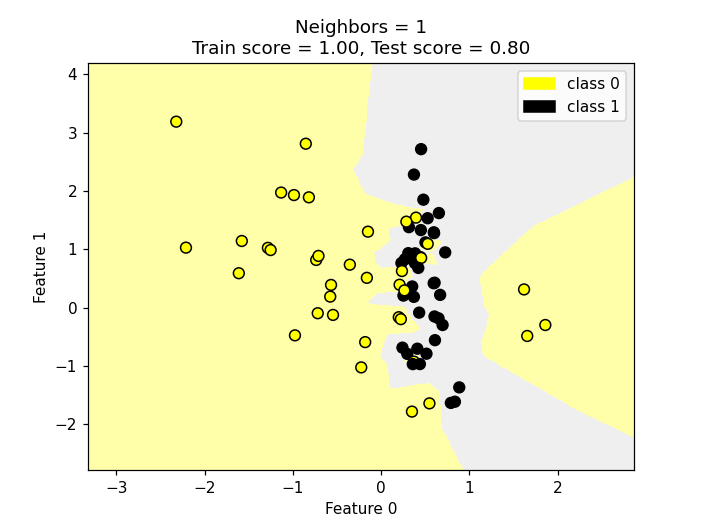

<IPython.core.display.Javascript object>


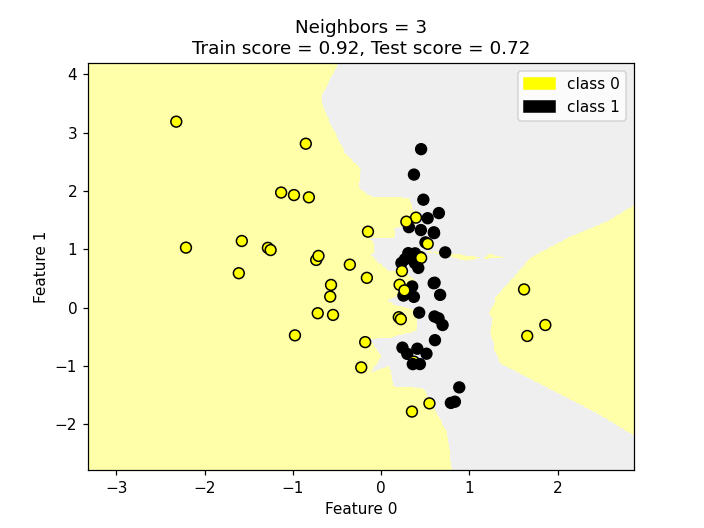

<IPython.core.display.Javascript object>


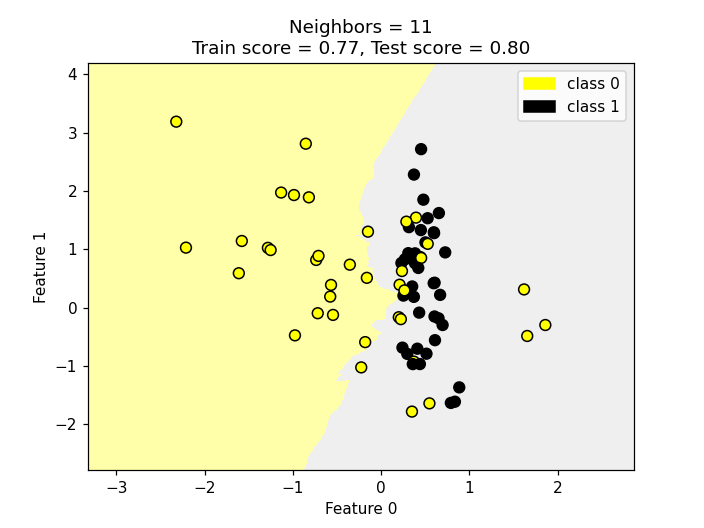

In [9]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_c1, y_c1, random_state=0)

plot_binary_knn(X_train, y_train, 1, 'uniform', X_test, y_test)
plot_binary_knn(X_train, y_train, 3, 'uniform', X_test, y_test)
plot_binary_knn(X_train, y_train, 11, 'uniform', X_test, y_test)
plt.show()

# Regression

In [10]:
from sklearn.neighbors import KNeighborsRegressor

In [11]:
X_train, X_test, y_train, y_test = train_test_split(X_r1, y_r1, random_state = 0)
knnreg = KNeighborsRegressor(n_neighbors=5).fit(X_train, y_train)

print(knnreg.predict(X_test))
print('R-2 score: {:.3f}'.format(knnreg.score(X_test, y_test)))

[231.70974697 148.35572605 150.58852659 150.58852659  72.14859259
 166.50590948 141.90634426 235.57098756 208.25897836 102.10462746
 191.31852674 134.50044902 228.32181403 148.35572605 159.16911306
 113.46875166 144.03646012 199.23189853 143.19242433 166.50590948
 231.70974697 208.25897836 128.01545355 123.14247619 141.90634426]
R-2 score: 0.425


<IPython.core.display.Javascript object>


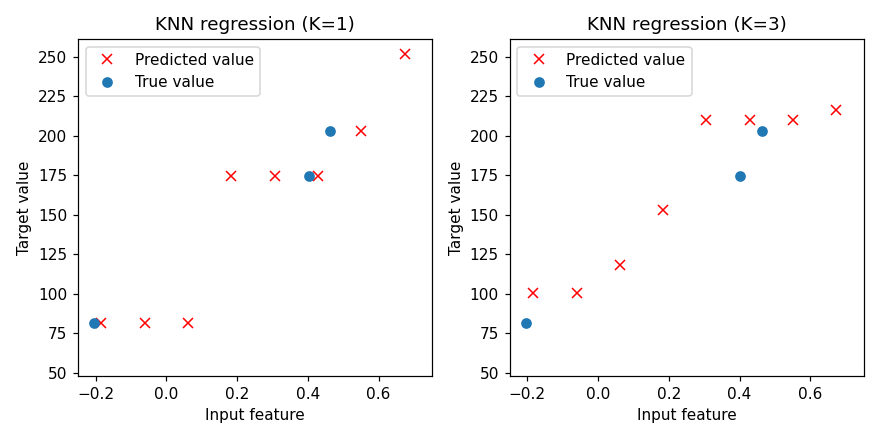

In [12]:
fig, subaxes = plt.subplots(1, 2, figsize=(8,4))
X_predict_input = np.linspace(-3,3,50).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_r1[::5], y_r1[::5], random_state=0)

for thisaxis, K in zip(subaxes, [1,3]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_pred_out = knnreg.predict(X_predict_input)
    
    thisaxis.set_xlim([-0.25, 0.75])
    thisaxis.plot(X_predict_input, y_pred_out, 'x',c='red', label='Predicted value')
    thisaxis.plot(X_train, y_train, 'o', label='True value')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Target value')
    thisaxis.set_title('KNN regression (K={})'.format(K))
    thisaxis.legend()
plt.tight_layout()

## Regression model complexity as a function of K

<IPython.core.display.Javascript object>


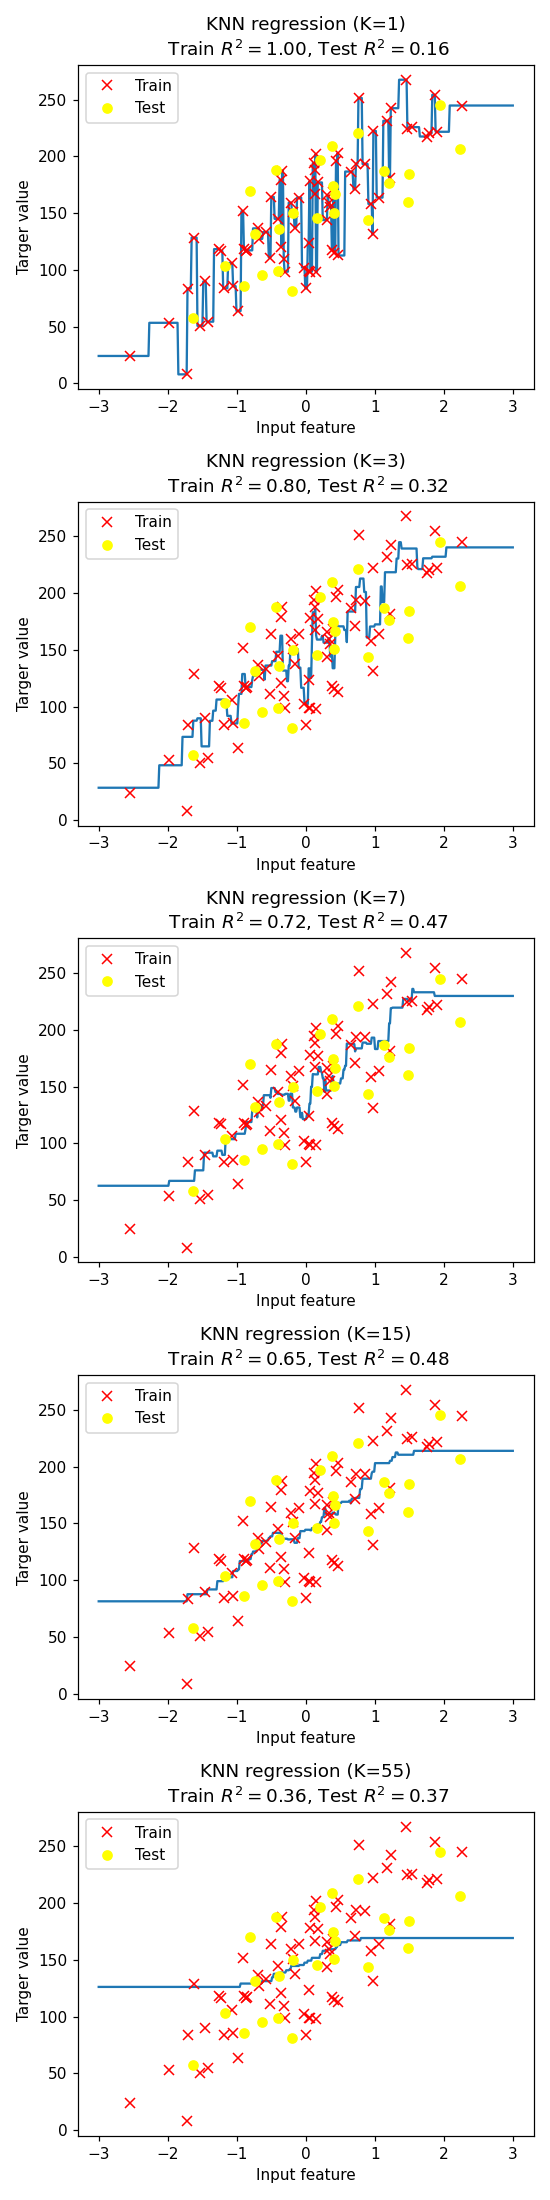

In [13]:
# Plotting of Knn-regression on a sample dataset for diffrent values of K

fig, subaxes = plt.subplots(5,1, figsize=(5,20))
X_pred_input = np.linspace(-3,3,500).reshape(-1,1)
X_train, X_test, y_train, y_test = train_test_split(X_r1,y_r1, random_state=0)

for thisaxis, K in zip(subaxes, [1,3,7,15,55]):
    knnreg = KNeighborsRegressor(n_neighbors=K).fit(X_train, y_train)
    y_pred = knnreg.predict(X_pred_input)
    train_score = knnreg.score(X_train, y_train)
    test_score = knnreg.score(X_test, y_test)
    thisaxis.plot(X_pred_input, y_pred)
    thisaxis.plot(X_train, y_train, 'x', c='red', label='Train')
    thisaxis.plot(X_test, y_test, 'o', c='yellow', label='Test')
    thisaxis.set_xlabel('Input feature')
    thisaxis.set_ylabel('Targer value')
    thisaxis.set_title('KNN regression (K={})\n Train $R^2 = {:.2f}$, Test $R^2 = {:.2f}$'.format(K,train_score,test_score))
    thisaxis.legend()
    plt.tight_layout()

## Linear regression

In [14]:
from sklearn.linear_model import LinearRegression

X_train, X_test, y_train, y_test = train_test_split(X_r1, y_r1, random_state=0)
lr = LinearRegression().fit(X_train, y_train)

print('linear model coefficient: {}\n linear model intercept: {:.4f}\n Train score: {:.4f}\n Test score: {:.4f}'.format(lr.coef_, lr.intercept_, lr.score(X_train, y_train), lr.score(X_test, y_test)))

linear model coefficient: [45.70870465]
 linear model intercept: 148.4458
 Train score: 0.6786
 Test score: 0.4916


<IPython.core.display.Javascript object>


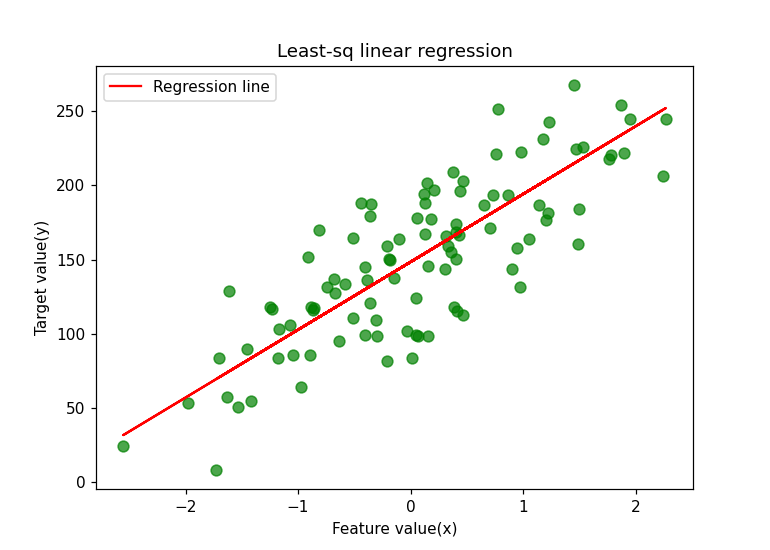

In [15]:
plt.figure(figsize=(7,5))
plt.scatter(X_r1, y_r1, s=50, c='green', alpha=0.7)
plt.plot(X_r1, lr.intercept_+lr.coef_*X_r1, c='red', label='Regression line')
plt.xlabel('Feature value(x)')
plt.ylabel('Target value(y)')
plt.title('Least-sq linear regression')
plt.legend()
plt.show()

## Ridge regrssion

In [16]:
from sklearn.linear_model import Ridge
X, y = crime.iloc[:,0:88], crime.iloc[:,-1]
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

ridreg = Ridge(alpha=20.0).fit(X_train, y_train)
print('Crime Dataset')
print('Ridge regression intercept:', ridreg.intercept_)
print('Ridge regression coefficients:', ridreg.coef_)
print('Training score {:.3f}'.format(ridreg.score(X_train, y_train)))
print('Testing score {:.3f}'.format(ridreg.score(X_test, y_test)))

Crime Dataset
Ridge regression intercept: -3352.423035846117
Ridge regression coefficients: [ 1.95091438e-03  2.19322667e+01  9.56286607e+00 -3.59178973e+01
  6.36465325e+00 -1.96885471e+01 -2.80715856e-03  1.66254486e+00
 -6.61426604e-03 -6.95450680e+00  1.71944731e+01 -5.62819154e+00
  8.83525114e+00  6.79085746e-01 -7.33614221e+00  6.70389803e-03
  9.78505502e-04  5.01202169e-03 -4.89870524e+00 -1.79270062e+01
  9.17572382e+00 -1.24454193e+00  1.21845360e+00  1.03233089e+01
 -3.78037278e+00 -3.73428973e+00  4.74595305e+00  8.42696855e+00
  3.09250005e+01  1.18644167e+01 -2.05183675e+00 -3.82210450e+01
  1.85081589e+01  1.52510829e+00 -2.20086608e+01  2.46283912e+00
  3.29328703e-01  4.02228467e+00 -1.12903533e+01 -4.69567413e-03
  4.27046505e+01 -1.22507167e-03  1.40795790e+00  9.35041855e-01
 -3.00464253e+00  1.12390514e+00 -1.82487653e+01 -1.54653407e+01
  2.41917002e+01 -1.32497562e+01 -4.20113118e-01 -3.59710660e+01
  1.29786751e+01 -2.80765995e+01  4.38513476e+01  3.86590044e+0

## Ridge regression with feature normalization

In [17]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

linridge = Ridge(alpha=20.0).fit(X_train_scaled, y_train)
print('Crime dataset')
print('ridge regression linear model intercept: {}'
     .format(linridge.intercept_))
print('ridge regression linear model coeff:\n{}'
     .format(linridge.coef_))
print('R-squared score (training): {:.3f}'
     .format(linridge.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}'
     .format(linridge.score(X_test_scaled, y_test)))
print('Number of non-zero features: {}'
     .format(np.sum(linridge.coef_ != 0)))


Crime dataset
ridge regression linear model intercept: 933.3906385044154
ridge regression linear model coeff:
[  88.68827454   16.48947987  -50.30285445  -82.90507574  -65.89507244
   -2.27674244   87.74108514  150.94862182   18.8802613   -31.05554992
  -43.13536109 -189.44266328   -4.52658099  107.97866804  -76.53358414
    2.86032762   34.95230077   90.13523036   52.46428263  -62.10898424
  115.01780357    2.66942023    6.94331369   -5.66646499 -101.55269144
  -36.9087526    -8.7053343    29.11999068  171.25963057   99.36919476
   75.06611841  123.63522539   95.24316483 -330.61044265 -442.30179004
 -284.49744001 -258.37150609   17.66431072 -101.70717151  110.64762887
  523.13611718   24.8208959     4.86533322  -30.46775619   -3.51753937
   50.57947231   10.84840601   18.27680946   44.11189865   58.33588176
   67.08698975  -57.93524659  116.1446052    53.81163718   49.01607711
   -7.62262031   55.14288543  -52.08878272  123.39291017   77.12562171
   45.49795317  184.91229771  -91.3572

## Ridge regrssion with regularization parameter: alpha

In [20]:
# Effect alpha regularization
alpha = [0, 1, 10, 20, 50, 100, 1000]
for i in alpha:
    linridge = Ridge(alpha=i).fit(X_train_scaled, y_train)
    r2_train = linridge.score(X_train_scaled, y_train)
    r2_test = linridge.score(X_test_scaled, y_test)
    num_coeff_big = np.sum(abs(linridge.coef_)>1.0)
    print('Alpha : {:.2f}\nnumber of non-zero features: {} r_sq_train: {:.2f}, r_sq_test: {:.2f}\n'.format(i,num_coeff_big,r2_train,r2_test))

Alpha : 0.00
number of non-zero features: 88 r_sq_train: 0.67, r_sq_test: 0.50

Alpha : 1.00
number of non-zero features: 87 r_sq_train: 0.66, r_sq_test: 0.56

Alpha : 10.00
number of non-zero features: 87 r_sq_train: 0.63, r_sq_test: 0.59

Alpha : 20.00
number of non-zero features: 88 r_sq_train: 0.61, r_sq_test: 0.60

Alpha : 50.00
number of non-zero features: 86 r_sq_train: 0.58, r_sq_test: 0.58

Alpha : 100.00
number of non-zero features: 87 r_sq_train: 0.55, r_sq_test: 0.55

Alpha : 1000.00
number of non-zero features: 84 r_sq_train: 0.31, r_sq_test: 0.30



C:\Users\Jitendra\anaconda3\lib\site-packages\sklearn\linear_model\_ridge.py:157: LinAlgWarning: Ill-conditioned matrix (rcond=3.48872e-18): result may not be accurate.
  return linalg.solve(A, Xy, sym_pos=True, overwrite_a=True).T


## Lasso regression

In [23]:
X_test_scaled

MinMaxScaler()

In [25]:
from sklearn.linear_model import Lasso
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
linlasso = Lasso(alpha=2.0).fit(X_train_scaled, y_train)

print('Crime dataset')
print('lasso regression linear model intercept: {}'
     .format(linlasso.intercept_))
print('lasso regression linear model coeff:\n{}'
     .format(linlasso.coef_))
print('Non-zero features: {}'
     .format(np.sum(linlasso.coef_ != 0)))
print('R-squared score (training): {:.3f}'
     .format(linlasso.score(X_train_scaled, y_train)))
print('R-squared score (test): {:.3f}\n'
     .format(linlasso.score(X_test_scaled, y_test)))
print('Features with non-zero weight (sorted by absolute magnitude):')

for e in sorted (list(zip(list(X), linlasso.coef_)),
                key = lambda e: -abs(e[1])):
    if e[1] != 0:
        print('\t{}, {:.3f}'.format(e[0], e[1]))

Crime dataset
lasso regression linear model intercept: 1186.6120619985786
lasso regression linear model coeff:
[    0.             0.            -0.          -168.18346054
    -0.            -0.             0.           119.6938194
     0.            -0.             0.          -169.67564456
    -0.             0.            -0.             0.
     0.             0.            -0.            -0.
     0.            -0.             0.             0.
   -57.52991966    -0.            -0.             0.
   259.32889226    -0.             0.             0.
     0.            -0.         -1188.7396867     -0.
    -0.            -0.          -231.42347299     0.
  1488.36512229     0.            -0.            -0.
    -0.             0.             0.             0.
     0.             0.            -0.             0.
    20.14419415     0.             0.             0.
     0.             0.           339.04468804     0.
     0.           459.53799903    -0.             0.
   122.69221826   

## Lasso regression with regularization parameter: alpha

In [27]:
# Effect of regularization parameter on training and testing scores
alpha = [0.5, 1, 2, 3, 5, 10, 20, 50]
for i in alpha:
    linlasso = Lasso(i,max_iter=10000).fit(X_train_scaled, y_train)
    r2_train = linlasso.score(X_train_scaled, y_train)
    r2_test = linlasso.score(X_test_scaled, y_test)
    print('Alpha: {:.2f}\nTrain_score: {:.2f}  Test_score: {:.2f}\n'.format(i, r2_train, r2_test))

Alpha: 0.50
Train_score: 0.65  Test_score: 0.64

Alpha: 1.00
Train_score: 0.64  Test_score: 0.65

Alpha: 2.00
Train_score: 0.63  Test_score: 0.64

Alpha: 3.00
Train_score: 0.62  Test_score: 0.63

Alpha: 5.00
Train_score: 0.60  Test_score: 0.62

Alpha: 10.00
Train_score: 0.57  Test_score: 0.59

Alpha: 20.00
Train_score: 0.51  Test_score: 0.52

Alpha: 50.00
Train_score: 0.31  Test_score: 0.32



## Polynomial regression

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.preprocessing import PolynomialFeatures

X_train, X_test, y_train, y_test = train_test_split(X_f1, y_f1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)
print('Coeffients: {}'.format(linreg.coef_))
print('Intercept: {:.2f}'.format(linreg.intercept_))
print('Train Score: {:.3f}'.format(linreg.score(X_train, y_train)))
print('Test Score: {:.3f}'.format(linreg.score(X_test, y_test)))

Coeffients: [ 4.42036739  5.99661447  0.52894712 10.23751345  6.5507973  -2.02082636
 -0.32378811]
Intercept: 1.54
Train Score: 0.722
Test Score: 0.722


#### We transform the original input data to add polynomial features up to degree 2 (quadratic)

In [33]:
poly = PolynomialFeatures(degree=2)
X_f1_poly = poly.fit_transform(X_f1)

X_train, X_test, y_train, y_test = train_test_split(X_f1_poly, y_f1, random_state=0)

linreg = LinearRegression().fit(X_train, y_train)

print('Coefficients: {}'.format(linreg.coef_))
print('Intercept: {:.2f}'.format(linreg.intercept_))
print('Train score: {:.3f}'.format(linreg.score(X_train, y_train)))
print('Test score: {:.3f}'.format(linreg.score(X_test, y_test)))

Coefficients: [ 3.40951018e-12  1.66452443e+01  2.67285381e+01 -2.21348316e+01
  1.24359227e+01  6.93086826e+00  1.04772675e+00  3.71352773e+00
 -1.33785505e+01 -5.73177185e+00  1.61813184e+00  3.66399592e+00
  5.04513181e+00 -1.45835979e+00  1.95156872e+00 -1.51297378e+01
  4.86762224e+00 -2.97084269e+00 -7.78370522e+00  5.14696078e+00
 -4.65479361e+00  1.84147395e+01 -2.22040650e+00  2.16572630e+00
 -1.27989481e+00  1.87946559e+00  1.52962716e-01  5.62073813e-01
 -8.91697516e-01 -2.18481128e+00  1.37595426e+00 -4.90336041e+00
 -2.23535458e+00  1.38268439e+00 -5.51908208e-01 -1.08795007e+00]
Intercept: -3.21
Train score: 0.969
Test score: 0.805


#### Addition of many polynomial features often leads to overfitting, so we often use polynomial features in combination with regression that has a regularization penalty, like ridge regression.

In [37]:
X_train, X_test, y_train, y_test = train_test_split(X_f1_poly, y_f1, random_state=0)

linridge = Ridge().fit(X_train, y_train)

print('(poly+regularization) Coefficients: {}'.format(linridge.coef_))
print('(poly+regularization) Intercept: {:.3f}'.format(linridge.intercept_))
print('(poly+regularization) Train score: {:.3f}'.format(linridge.score(X_train, y_train)))
print('(poly+regularization) Test score: {:.3f}'.format(linridge.score(X_test, y_test)))
      

(poly+regularization) Coefficients: [ 0.          2.229281    4.73349734 -3.15432089  3.8585194   1.60970912
 -0.76967054 -0.14956002 -1.75215371  1.5970487   1.37080607  2.51598244
  2.71746523  0.48531538 -1.9356048  -1.62914955  1.51474518  0.88674141
  0.26141199  2.04931775 -1.93025705  3.61850966 -0.71788143  0.63173956
 -3.16429847  1.29161448  3.545085    1.73422041  0.94347654 -0.51207219
  1.70114448 -1.97949067  1.80687548 -0.2173863   2.87585898 -0.89423157]
(poly+regularization) Intercept: 5.418
(poly+regularization) Train score: 0.826
(poly+regularization) Test score: 0.825
